In [5]:
!git clone https://github.com/tvhahn/weibull-knowledge-informed-ml.git
# move into project folder
%cd weibull-knowledge-informed-ml

# make editable
!pip install gdown
!pip install -e .

Cloning into 'weibull-knowledge-informed-ml'...
remote: Enumerating objects: 1051, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 1051 (delta 67), reused 66 (delta 46), pack-reused 955
Receiving objects: 100% (1051/1051), 49.76 MiB | 12.52 MiB/s, done.
Resolving deltas: 100% (666/666), done.
/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull/weibull-knowledge-informed-ml
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this beh

In [8]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull/weibull-knowledge-informed-ml
  Preparing metadata (setup.py) ... done
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: src
    Found existing insta

In [44]:
import numpy as np
from pathlib import Path
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal, fftpack
import time
import datetime
import h5py
from shutil import copyfile

from src.features.build_features import (
    create_fft, 
    build_spectrogram_df_ims, 
    build_spectrogram_df_femto
)

from src.visualization.visualize_data import (
    create_time_frequency_plot, 
    plot_freq_peaks, 
    plot_spectogram_with_binned, 
    ims_data_processed_fig, 
    femto_data_processed_fig,
)

from src.visualization.visualize_results import (
    loss_function_percentage_fig,
    early_stop_distribution_fig,
    loss_function_correlation_fig,
    femto_results_rul_fig,
    ims_results_rul_fig,
)

from src.data.data_utils import (
    create_date_dict, 
    load_train_test_ims, 
    load_train_test_femto
)
from src.data.dataset_femto import create_femto_dataset

from IPython.display import clear_output, display, Image # clear the output if needed
import warnings
warnings.filterwarnings("ignore") # supress all the matplotlib deprecation warnings
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'data_utils'

In [48]:
root_dir = '/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull'
print(root_dir) 

/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull


bash: /content/weibull-knowledge-informed-ml/src/data/download_data_local.sh: No such file or directory


In [51]:
%cd /home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull/weibull-knowledge-informed-ml

/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull/weibull-knowledge-informed-ml


In [56]:
!bash /home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull/weibull-knowledge-informed-ml/src/data/download_data_local.sh /home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull/weibull-knowledge-informed-ml/

/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/model/weibull/weibull-knowledge-informed-ml/src/data/download_data_local.sh: line 6: python: command not found


In [31]:
folder_raw_data_train = (root_dir + "/Learning_set/")
folder_indv_bearing = folder_raw_data_train + "Bearing1_1/"

print(folder_indv_bearing)
date_dict = create_date_dict(folder_indv_bearing)
df_spec, labels_dict = build_spectrogram_df_femto(folder_indv_bearing, date_dict, channel_name="acc_horz",)

/home/i4624/vscode/gitclone/SWbootProject_2023-7/Team-project/data/ieee-phm-2012-data-challenge-dataset-master/Learning_set/Bearing1_1/


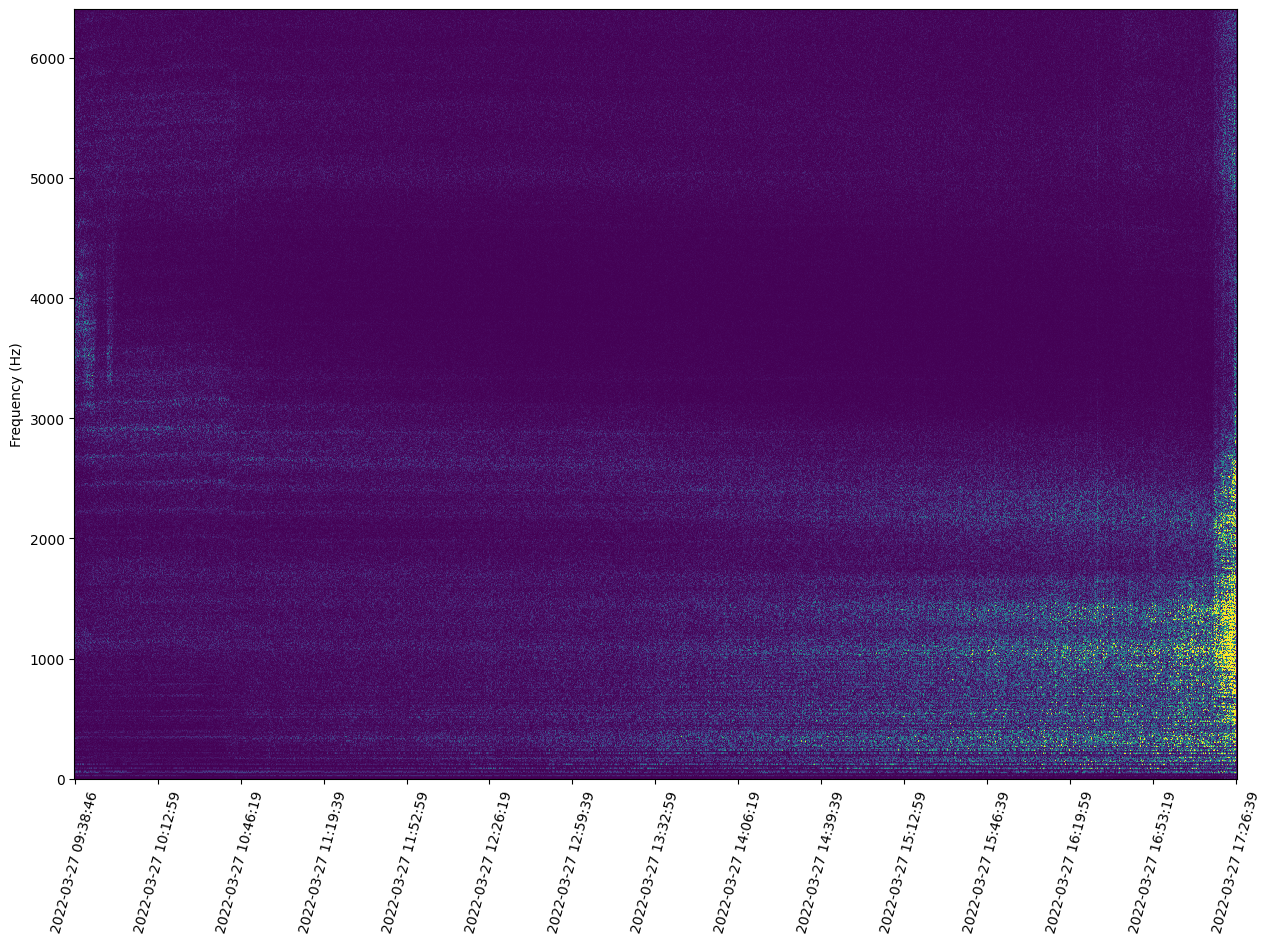

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

plt.pcolormesh(df_spec.columns, df_spec.index, df_spec, vmax=0.2) # need to add a vmax so that the color is not all dark

ax.set_ylabel("Frequency (Hz)")
plt.xticks(df_spec.columns[::200]) # show every 200th date on x-axis ticks
plt.xticks(rotation=75)

plt.show()

UsageError: %%python is a cell magic, but the cell body is empty.


In [43]:
import numpy as np
from pathlib import Path
import os
import h5py




ModuleNotFoundError: No module named 'data_utils'

In [45]:


create_femto_dataset(folder_raw_data_train_femto, folder_raw_data_test_femto, 
    folder_indv_bearing, bucket_size=64, random_state_int=694)

NameError: name 'create_femto_dataset' is not defined

In [ ]:
folder_data = root_dir + "data/processed/FEMTO/"

(
    x_train,
    y_train,
    x_val,
    y_val,
    x_test,
    y_test,
    x_train1_1,
    y_train1_1,
    x_train2_1,
    y_train2_1,
    x_train3_1,
    y_train3_1,
    x_val1_2,
    y_val1_2,
    x_val2_2,
    y_val2_2,
    x_val3_2,
    y_val3_2,
    x_test1_3,
    y_test1_3,
    x_test2_3,
    y_test2_3,
    x_test3_3,
    y_test3_3,
) = load_train_test_femto(folder_data)

print("x_train.shape,", x_train.shape)
print("y_train.shape,", y_train.shape)